In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate, Embedding
from tensorflow.keras.layers import Activation, ReLU, LeakyReLU, PReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, AlphaDropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from functools import partial

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
COLUMNS = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
    "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", 
    "hours_per_week", "native_country", "income_bracket"
]

CATEGORICAL_COLUMNS = [
    "workclass", "education", "marital_status", "occupation", "relationship", 
    "race", "gender", "native_country"
]

CONTINUOUS_COLUMNS = [
    "age", "education_num", "capital_gain", "capital_loss", "hours_per_week"
]

# Data 준비

In [3]:
train = pd.read_csv('./dataset/adult.data')
train

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
train = pd.read_csv('./dataset/adult.data', names=COLUMNS)
train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test = pd.read_csv('./dataset/adult.test')
test

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
test = pd.read_csv('./dataset/adult.test', skiprows=1, names=COLUMNS)
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income_bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   gender          16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income_bracket  16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [10]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

# Data 탐색

In [11]:
def simple_column_check(data, i) :
    print('column name :', data.columns[i], '\n')
    print(data[data.columns[i]].value_counts(), '\n')
    data[data.columns[i]].hist(xrot=45)

## age

column name : age 

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 



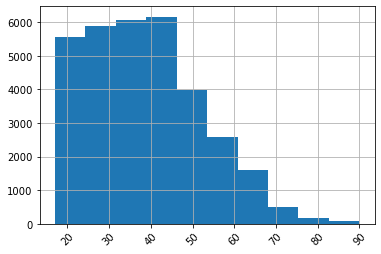

In [12]:
simple_column_check(train, 0)

## workclass : null
- 누락값이 '?'로 표시됨

column name : workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 



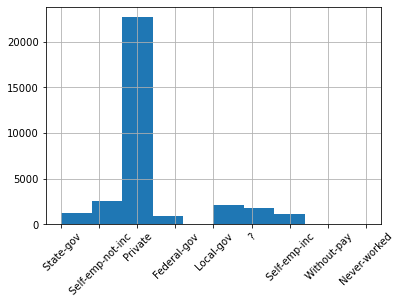

In [13]:
simple_column_check(train, 1)

In [14]:
len(train[train['workclass'] == '?']) / len(train) * 100

0.0

In [15]:
train[train['workclass'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket


In [16]:
train['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

## fnlwgt
- 무엇을 의미하는지 모르겠음

column name : fnlwgt 

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64 



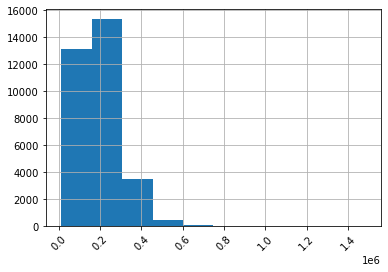

In [17]:
simple_column_check(train, 2)

## education

column name : education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 



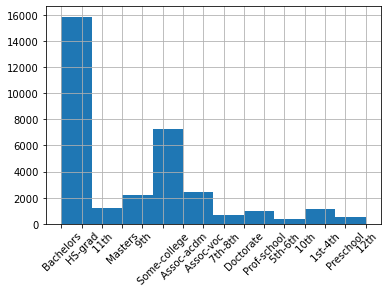

In [18]:
simple_column_check(train, 3)

## education_num (X)
- education을 숫자로 labeling 함

column name : education_num 

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64 



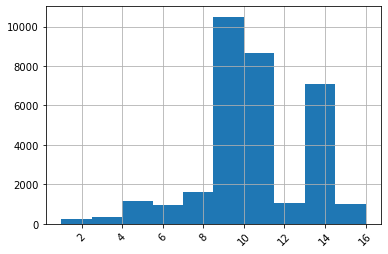

In [19]:
simple_column_check(train, 4)

## marital_status

column name : marital_status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 



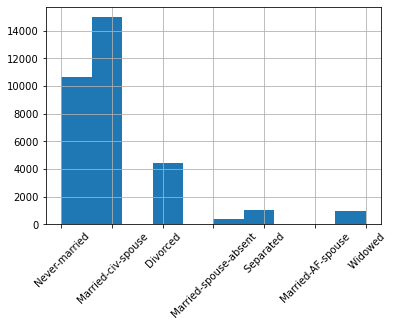

In [20]:
simple_column_check(train, 5)

## occupation : null
- 누락값이 '?'로 표시됨

column name : occupation 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64 



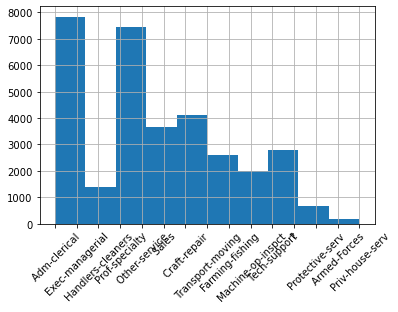

In [21]:
simple_column_check(train, 6)

In [22]:
train[train['occupation'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket


## relationship

column name : relationship 

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64 



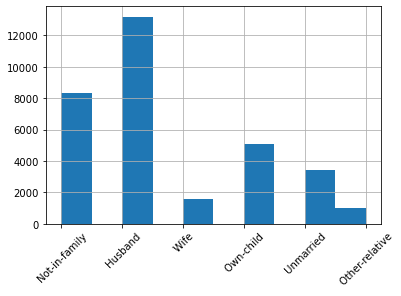

In [23]:
simple_column_check(train, 7)

## race

column name : race 

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64 



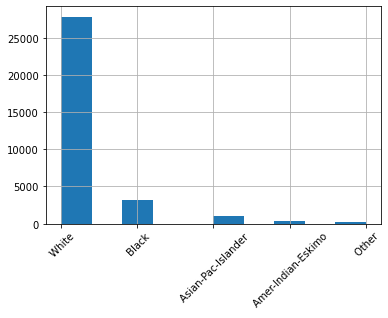

In [24]:
simple_column_check(train, 8)

## gender

column name : gender 

 Male      21790
 Female    10771
Name: gender, dtype: int64 



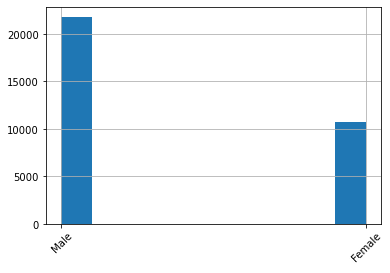

In [25]:
simple_column_check(train, 9)

## capital_gain

column name : capital_gain 

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64 



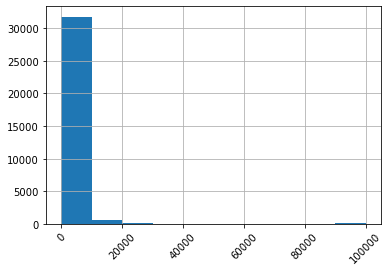

In [26]:
simple_column_check(train, 10)

## capital_loss

column name : capital_loss 

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64 



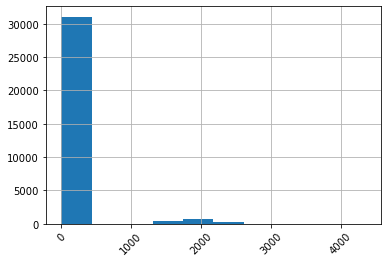

In [27]:
simple_column_check(train, 11)

## hours_per_week

column name : hours_per_week 

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64 



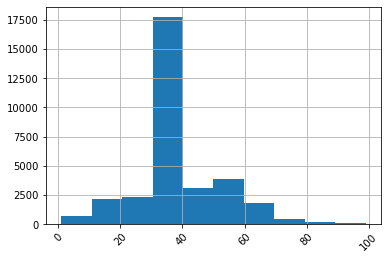

In [28]:
simple_column_check(train, 12)

## native_country : null

column name : native_country 

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru  

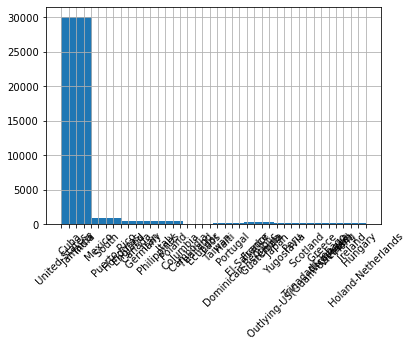

In [29]:
simple_column_check(train, 13)

## income_bracket

column name : income_bracket 

 <=50K    24720
 >50K      7841
Name: income_bracket, dtype: int64 



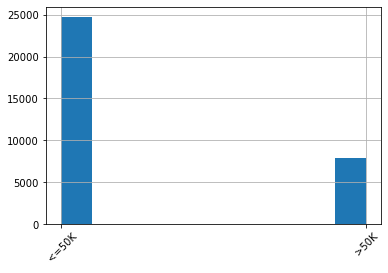

In [30]:
simple_column_check(train, 14)

# 모델을 위한 data 준비

## Data concat

In [31]:
data = pd.concat([train, test], axis=0)

## Label 생성

In [32]:
data['label'] = data['income_bracket'].apply(lambda x : ">50K" in x).astype(int)

In [33]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,0


## 불필요 column 삭제

In [34]:
data.drop(['income_bracket', 'education_num'], axis=1, inplace=True)

## Target 분리

In [35]:
X = data.drop('label', axis=1)
y = data['label']

## num & cat columns 설정

In [36]:
columns_num = []

for column in X.columns :
    
    if X[column].dtypes != 'object' :
        columns_num.append(column)

In [37]:
columns_num

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [38]:
columns_cat = []

for column in X.columns :
    
    if X[column].dtypes == 'object' :
        columns_cat.append(column)

In [39]:
columns_cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

## 범주형 data 처리

### LabelEncoder 사용

In [40]:
X_le = X.copy()

In [41]:
for c in CATEGORICAL_COLUMNS:
    le = LabelEncoder()
    X_le[c] = le.fit_transform(X_le[c])

In [42]:
X_le.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,77516,9,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,2,10,5,2,0,0,0,40,5


In [43]:
columns_cat_le = list(X_le.columns)

for i in columns_num :
    columns_cat_le.remove(i)

In [44]:
columns_cat_le

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

### one-hot-encoding

In [45]:
X_ohe = pd.get_dummies(X)
X_ohe.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
columns_cat_ohe = list(X_ohe.columns)

for i in columns_num :
    columns_cat_ohe.remove(i)

In [47]:
len(columns_cat_ohe)

102

## train, test set 분리

In [48]:
n = len(train)

In [49]:
X_le_train = X_le[:n]
X_le_test = X_le[n:]

In [50]:
X_ohe_train = X_ohe[:n]
X_ohe_test = X_ohe[n:]

In [51]:
y_train = y[:n]
y_test = y[n:]

## 수치형 data 처리

In [52]:
scaler = StandardScaler()
X_le_train[columns_num] = scaler.fit_transform(X_le_train[columns_num])
X_le_test[columns_num] = scaler.transform(X_le_test[columns_num])

In [53]:
X_le_train

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,0.030671,7,-1.063611,9,4,1,1,4,1,0.148453,-0.21666,-0.035429,39
1,0.837109,6,-1.008707,9,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39
2,-0.042642,4,0.245079,11,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39
3,1.057047,4,0.425801,1,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39
4,-0.775768,4,1.408176,9,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,2,13,5,4,0,-0.145920,-0.21666,-0.197409,39
32557,0.103983,4,-0.335433,11,2,7,0,4,1,-0.145920,-0.21666,-0.035429,39
32558,1.423610,4,-0.358777,11,6,1,4,4,0,-0.145920,-0.21666,-0.035429,39
32559,-1.215643,4,0.110960,11,4,1,3,4,1,-0.145920,-0.21666,-1.655225,39


In [54]:
scaler = StandardScaler()
X_ohe_train[columns_num] = scaler.fit_transform(X_ohe_train[columns_num])
X_ohe_test[columns_num] = scaler.transform(X_ohe_test[columns_num])

# Model 생성

In [55]:
X_le_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int32  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int32  
 4   marital_status  32561 non-null  int32  
 5   occupation      32561 non-null  int32  
 6   relationship    32561 non-null  int32  
 7   race            32561 non-null  int32  
 8   gender          32561 non-null  int32  
 9   capital_gain    32561 non-null  float64
 10  capital_loss    32561 non-null  float64
 11  hours_per_week  32561 non-null  float64
 12  native_country  32561 non-null  int32  
dtypes: float64(5), int32(8)
memory usage: 2.5 MB


In [56]:
X_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Columns: 107 entries, age to native_country_ Yugoslavia
dtypes: float64(5), uint8(102)
memory usage: 4.7 MB


- embedding layer에 적용하는 column은 모두 정수화가 되어 있어야 함

In [57]:
def get_deep_model(data, columns_cat) :
    category_inputs = []
    category_embeds = []
    
    # 범주형 data 임베딩
    for i in range(len(columns_cat)) :
        input_i = Input(shape=(1,), dtype='int32')
        
        dim = len(np.unique(data[columns_cat[i]]))
        embed_dim = int(np.ceil(dim ** 0.5)) # embedding 차원을 0.5배 정도로 해서 한다.
        embed_i = Embedding(dim, embed_dim, input_length=1)(input_i)
        
        flatten_i = Flatten()(embed_i)
        category_inputs.append(input_i)
        category_embeds.append(flatten_i)
        
    # 수치형 data input
    continue_input = Input(shape=(len(columns_num),))
    continue_dense = Dense(256, use_bias=False)(continue_input)
    
    # category와 continue를 합침
    concat_embeds = concatenate([continue_dense] + category_embeds)
    concat_embeds = Activation('relu')(concat_embeds)
    bn_concat = BatchNormalization()(concat_embeds)

    fc1 = Dense(512, use_bias=False)(bn_concat)
    relu1 = ReLU()(fc1)
    bn1 = BatchNormalization()(relu1)
    fc2 = Dense(256, use_bias=False)(bn1)
    relu2 = ReLU()(fc2)
    bn2 = BatchNormalization()(relu2)
    fc3 = Dense(128)(bn2)
    relu3 = ReLU()(fc3)
    
    return category_inputs, continue_input, relu3

In [58]:
def get_wide_model(columns_cat):
    dim = len(columns_cat)
    
    return Input(shape=(dim,))

In [59]:
category_inputs_le, continue_input_le, deep_model_le = get_deep_model(X_le_train, columns_cat_le)
wide_model_le = get_wide_model(columns_cat_le)

In [60]:
category_inputs_ohe, continue_input_ohe, deep_model_ohe = get_deep_model(X_ohe_train, columns_cat_ohe)
wide_model_ohe = get_wide_model(columns_cat_ohe)

In [61]:
out_layer_le = concatenate([deep_model_le, wide_model_le])
inputs_le = [continue_input_le] + category_inputs_le + [wide_model_le]
output_le = Dense(1, activation='sigmoid')(out_layer_le)
model_le = Model(inputs=inputs_le, outputs=output_le)

In [62]:
out_layer_ohe = concatenate([deep_model_ohe, wide_model_ohe])
inputs_ohe = [continue_input_ohe] + category_inputs_ohe + [wide_model_ohe]
output_ohe = Dense(1, activation='sigmoid')(out_layer_ohe)
model_ohe = Model(inputs=inputs_ohe, outputs=output_ohe)

# Model 훈련

## LabelEncoder 사용

In [63]:
model_le.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

- 수치형 데이터 전체 -> 범주형 데이터 각 칼럼 -> 범주형 데이터 전체 순으로 입력으로 넣어준다.

In [64]:
input_data_le = [X_le_train[columns_num]] + [X_le_train[column] for column in columns_cat_le] + [X_le_train[columns_cat_le]]

In [65]:
epochs = 30
optimizer ='adam'
batch_size = 128

In [66]:
model_le.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
checkpoint = ModelCheckpoint("wide-deep_le.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [68]:
model_le.fit(input_data_le, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.15,
             callbacks=[checkpoint, early_stopping])

Epoch 1/30
216/217 [============================>.] - ETA: 0s - loss: 0.3848 - accuracy: 0.8217
Epoch 00001: val_loss improved from inf to 0.43241, saving model to wide-deep_le.h5
217/217 [==============================] - 5s 24ms/step - loss: 0.3848 - accuracy: 0.8217 - val_loss: 0.4324 - val_accuracy: 0.7953
Epoch 2/30
214/217 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8410
Epoch 00002: val_loss improved from 0.43241 to 0.35954, saving model to wide-deep_le.h5
217/217 [==============================] - 4s 18ms/step - loss: 0.3398 - accuracy: 0.8406 - val_loss: 0.3595 - val_accuracy: 0.8264
Epoch 3/30
217/217 [==============================] - ETA: 0s - loss: 0.3278 - accuracy: 0.8471
Epoch 00003: val_loss improved from 0.35954 to 0.32790, saving model to wide-deep_le.h5
217/217 [==============================] - 4s 18ms/step - loss: 0.3278 - accuracy: 0.8471 - val_loss: 0.3279 - val_accuracy: 0.8477
Epoch 4/30
214/217 [============================>.] - ET

## one-hot-encoding

In [69]:
model_ohe.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 1)]          0                                            
_______________________________________________________________________________________

__________________________________________________________________________________________________
flatten_69 (Flatten)            (None, 2)            0           embedding_69[0][0]               
__________________________________________________________________________________________________
flatten_70 (Flatten)            (None, 2)            0           embedding_70[0][0]               
__________________________________________________________________________________________________
flatten_71 (Flatten)            (None, 2)            0           embedding_71[0][0]               
__________________________________________________________________________________________________
flatten_72 (Flatten)            (None, 2)            0           embedding_72[0][0]               
__________________________________________________________________________________________________
flatten_73 (Flatten)            (None, 2)            0           embedding_73[0][0]               
__________

                                                                 input_114[0][0]                  
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 1)            231         concatenate_3[0][0]              
Total params: 406,319
Trainable params: 403,863
Non-trainable params: 2,456
__________________________________________________________________________________________________


- 수치형 데이터 전체 -> 범주형 데이터 각 칼럼 -> 범주형 데이터 전체 순으로 입력으로 넣어준다.

In [70]:
input_data_ohe = [X_ohe_train[columns_num]] + [X_ohe_train[column] for column in columns_cat_ohe] + [X_ohe_train[columns_cat_ohe]]

In [71]:
epochs = 30
optimizer ='adam'
batch_size = 128

In [72]:
model_ohe.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
checkpoint = ModelCheckpoint("wide-deep_ohe.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [74]:
model_ohe.fit(input_data_ohe, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.15,
             callbacks=[checkpoint, early_stopping])

Epoch 1/30
214/217 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8345
Epoch 00001: val_loss improved from inf to 0.43645, saving model to wide-deep_ohe.h5
217/217 [==============================] - 10s 46ms/step - loss: 0.3509 - accuracy: 0.8348 - val_loss: 0.4365 - val_accuracy: 0.7785
Epoch 2/30
216/217 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8546
Epoch 00002: val_loss improved from 0.43645 to 0.35576, saving model to wide-deep_ohe.h5
217/217 [==============================] - 6s 27ms/step - loss: 0.3160 - accuracy: 0.8545 - val_loss: 0.3558 - val_accuracy: 0.8407
Epoch 3/30
216/217 [============================>.] - ETA: 0s - loss: 0.3091 - accuracy: 0.8563
Epoch 00003: val_loss improved from 0.35576 to 0.31476, saving model to wide-deep_ohe.h5
217/217 [==============================] - 9s 42ms/step - loss: 0.3093 - accuracy: 0.8563 - val_loss: 0.3148 - val_accuracy: 0.8538
Epoch 4/30
215/217 [============================>.] 

# Model 평가

## LabelEncoder 사용

In [75]:
eval_data_le = [X_le_test[columns_num]] + [X_le_test[column] for column in columns_cat_le] + [X_le_test[columns_cat_le]]

In [76]:
loss, acc = model_le.evaluate(eval_data_le, y_test)

509/509 [==============================] - 2s 5ms/step - loss: 0.3164 - accuracy: 0.8524


In [77]:
print(f'test_loss: {loss} - test_acc: {acc}')

test_loss: 0.31639325618743896 - test_acc: 0.8524046540260315


## one-hot-encoding

In [78]:
eval_data_ohe = [X_ohe_test[columns_num]] + [X_ohe_test[column] for column in columns_cat_ohe] + [X_ohe_test[columns_cat_ohe]]

In [79]:
loss, acc = model_ohe.evaluate(eval_data_ohe, y_test)

509/509 [==============================] - 5s 9ms/step - loss: 0.3163 - accuracy: 0.8528


In [80]:
print(f'test_loss: {loss} - test_acc: {acc}')

test_loss: 0.3162554204463959 - test_acc: 0.8527731895446777


# Plot model

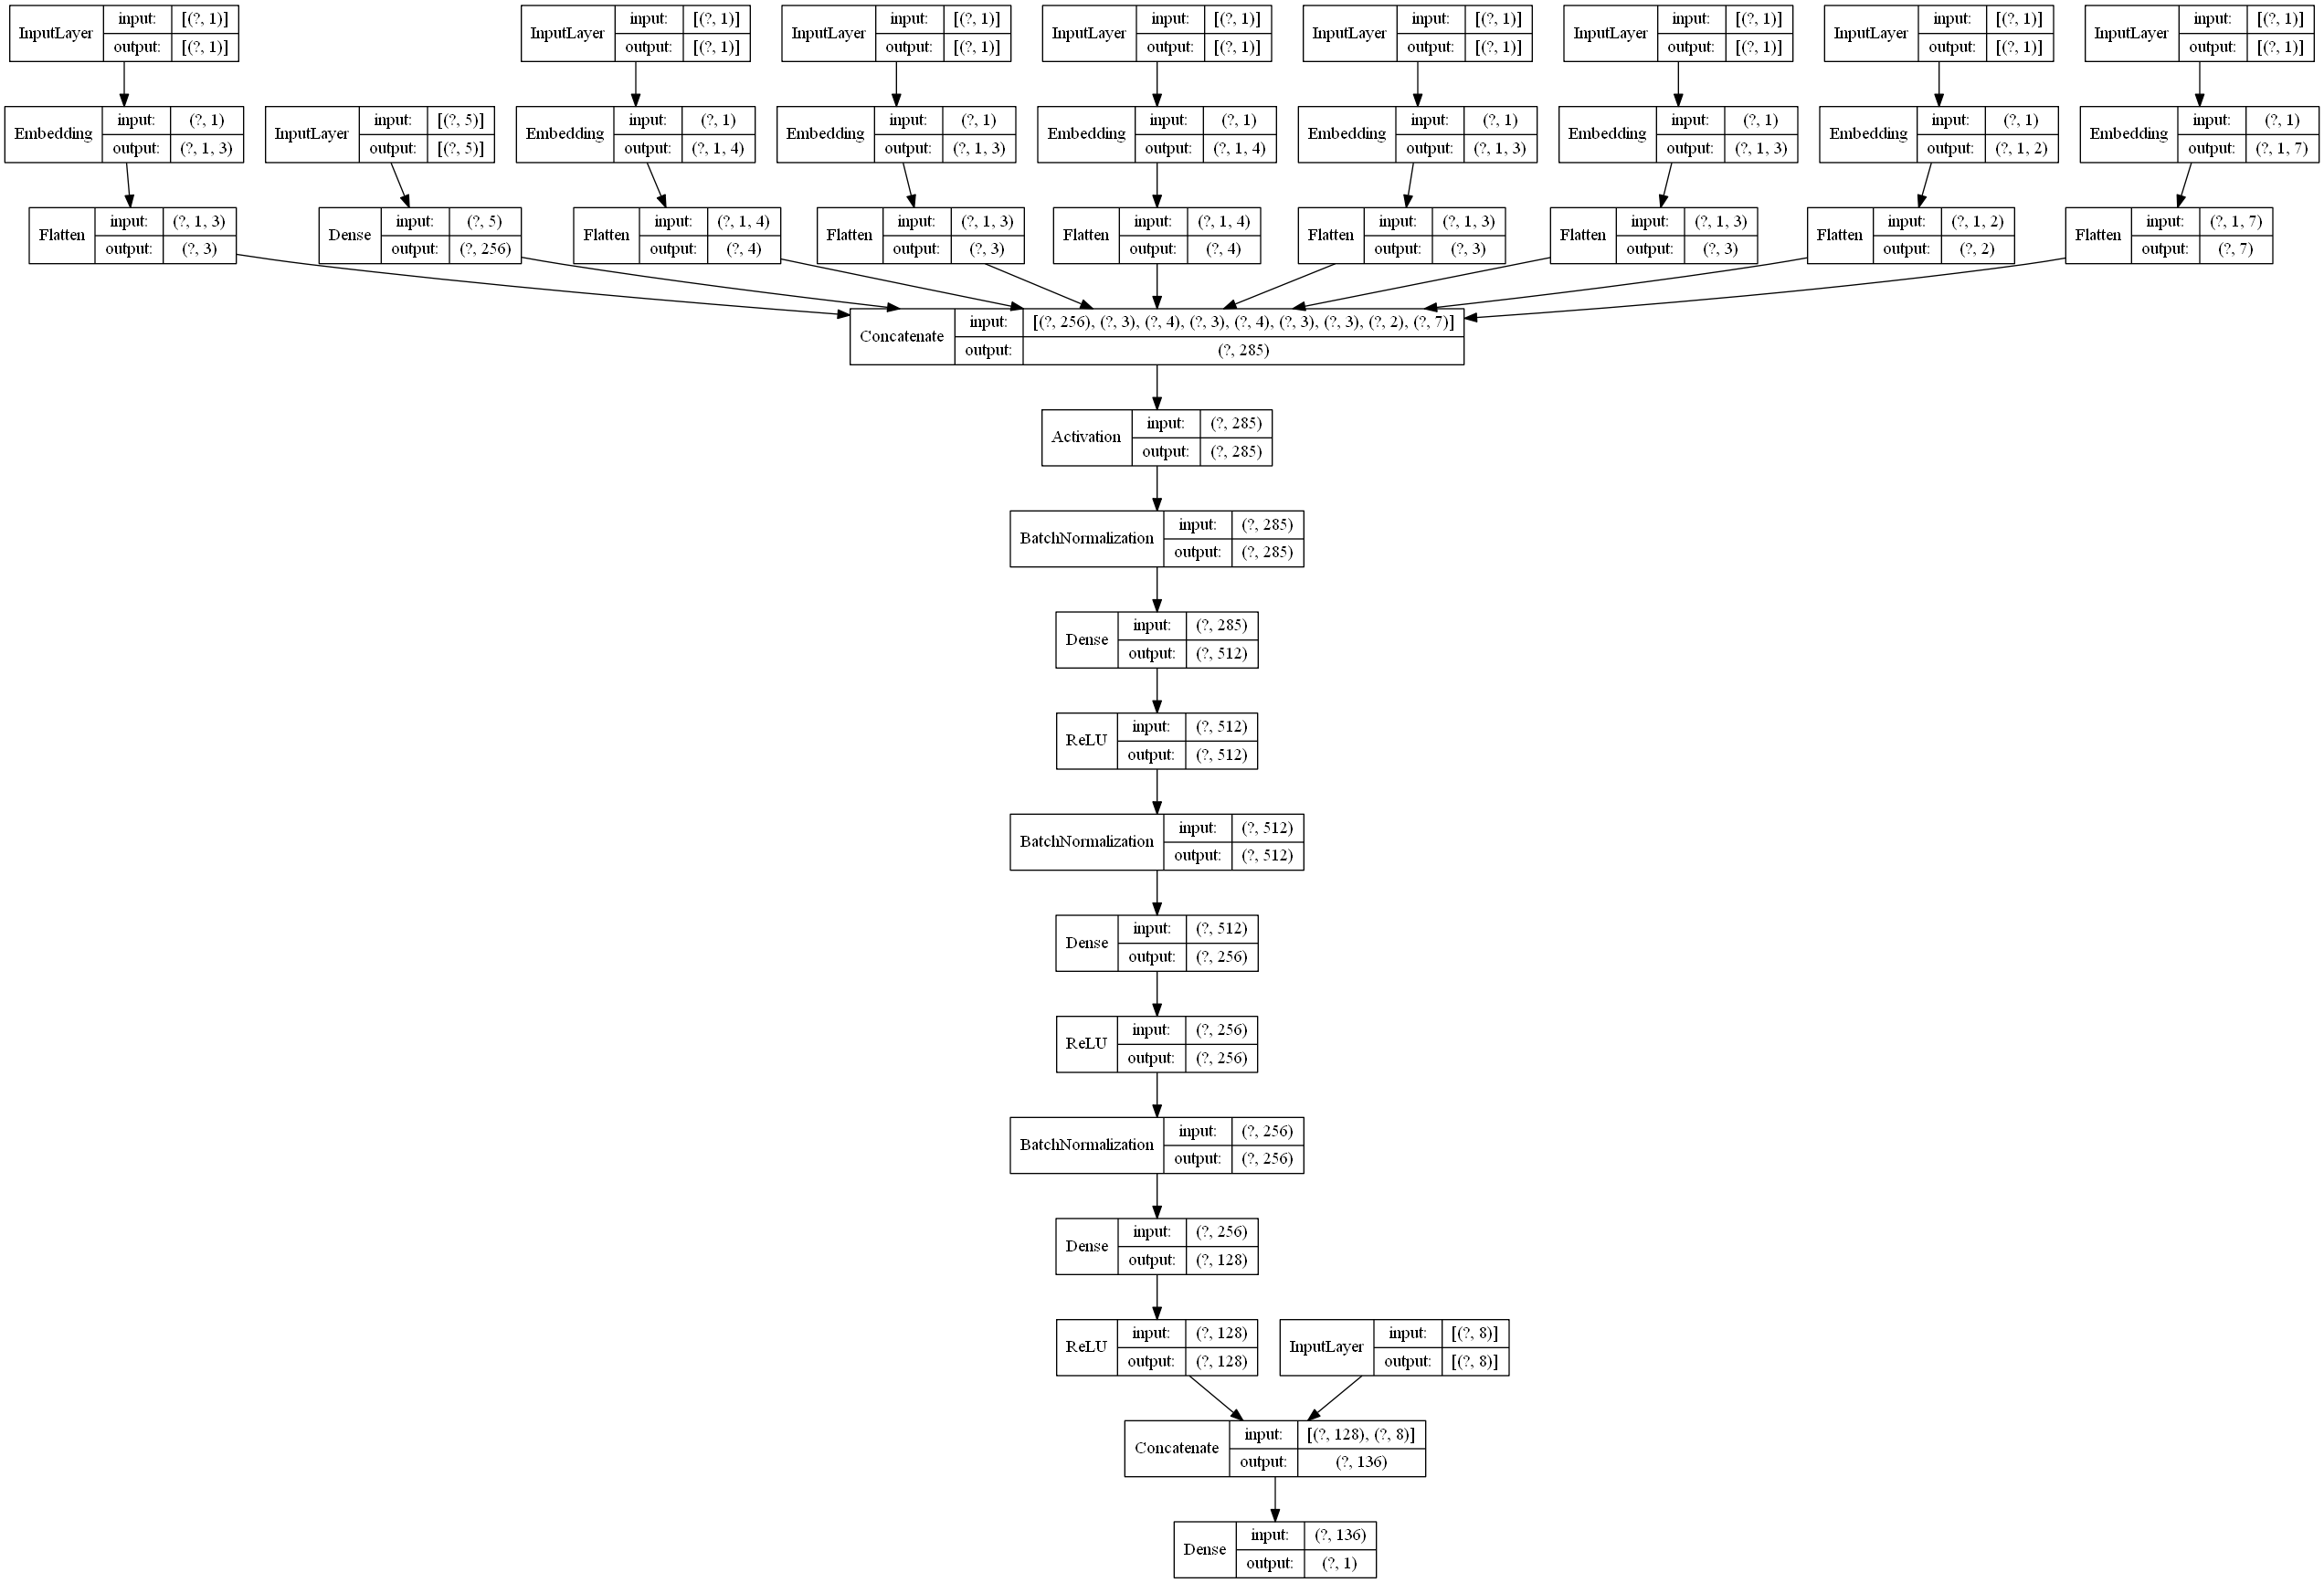

In [81]:
plot_model(model_le, to_file='model.png', show_shapes=True, show_layer_names=False)